---
# Step 0 . Import Libraries

---

In [22]:
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ml_models.data_loader import *
from pre_processing.normalization_utils import *

In [15]:
import scienceplots

plt.style.use('science')

plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Match thesis fonts
    "font.serif": ["New Century Schoolbook", "Computer Modern Roman", "Times"],  # Match fouriernc
    "font.size": 12,  
    "axes.labelsize": 12,  
    "legend.fontsize": 10,  
    "xtick.labelsize": 10,  
    "ytick.labelsize": 10,  
    "axes.grid": True,  
    "grid.linestyle": "--",  
    "grid.alpha": 0.5,  
    "legend.frameon": False,  
})

---
## Data Normalization

In this notebook, I experimented with several normalization techniques to preprocess the EIT data:

1. **No Normalization**  
2. **Global Z-Score Normalization**  
3. **Participant Z-Score Normalization**  
4. **Participant Mean-Free Normalization**  

### Final Choice: Participant Mean-Free Normalization

After comparing these methods, **Participant Mean-Free Normalization** showed the best performance.  
This approach helps the model generalize more effectively and make predictions on unseen data by standardizing features and minimizing the influence of outliers.

In particular, when one participant is left out for testing, the model is still able to make accurate predictions for the others, demonstrating improved robustness across participants.

---


# Steps:

1. Load the EIT data using different normalization methods.
2. Plot the first two PCA components.

In [16]:
dataset_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Dataset/"

participants = ['P01','P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 
                'P10', 'P11', 'P12', 'P13', 'P14', 'P15']

Loading participants: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15']
Normalization method: none


Loading data: 100%|██████████| 15/15 [00:15<00:00,  1.07s/it]


✅ Saved PCA scatter: PCA_outputs/PCA_scatter_No_Normalization.png


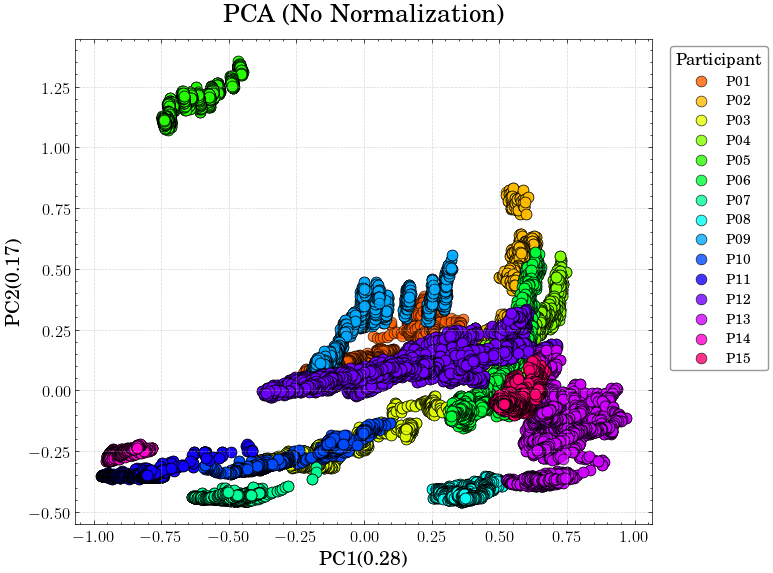

In [17]:
# ---------- No Normalization ----------

X_raw, Y_raw, P_raw = load_data(participants,
                                z_score_norm="none",
                                path=dataset_dir,
                                print_info=True)

plot_pca_by_participant(X_raw, P_raw,
                        method_name="No Normalization")

Loading data: 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]


✅ Saved PCA scatter: PCA_outputs/PCA_scatter_Global_Z-Score.png


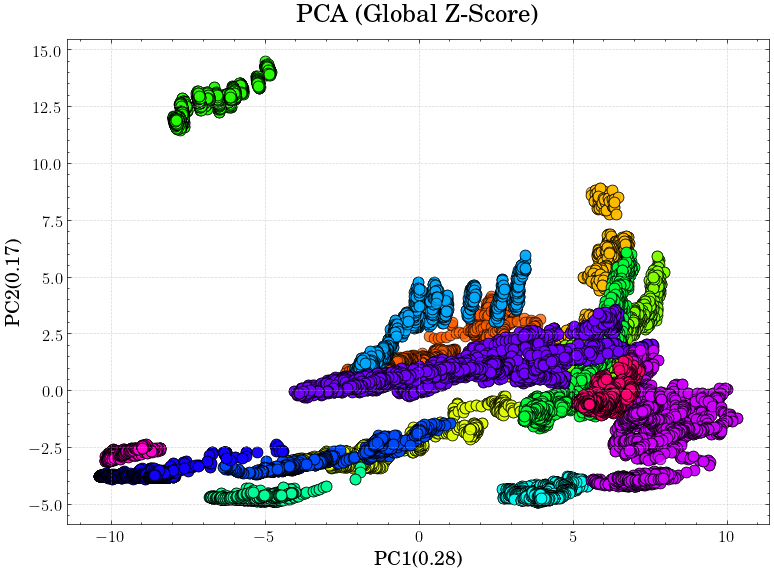

In [18]:
# ---------- Global Z-Score Normalization ----------
X_glob, Y_glob, P_glob = load_data(participants,
                                  z_score_norm="global",
                                  path=dataset_dir,
                                  print_info=False)
plot_pca_by_participant(X_glob, P_glob,
                        method_name="Global Z-Score", show_legend=False)

##

Loading data: 100%|██████████| 15/15 [00:14<00:00,  1.00it/s]


✅ Saved PCA scatter: PCA_outputs/PCA_scatter_Participant_Z-Score.png


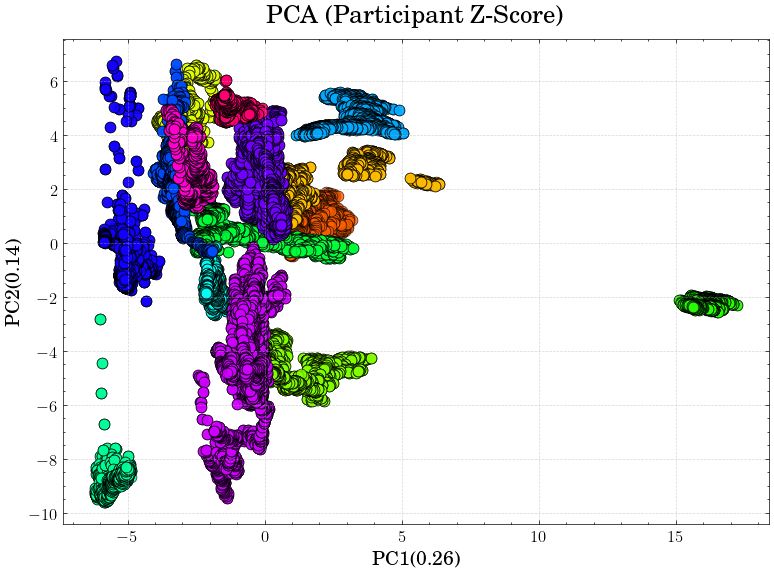

In [19]:
# ---------- Participant Z-Score Normalization ----------
X_p, Y_p, P_p = load_data(
    participants,
    z_score_norm="participant",
    path=dataset_dir,
    print_info=False
)

plot_pca_by_participant(
    X_p,
    P_p,######
    method_name="Participant Z-Score",
    show_legend=False
)


Loading data: 100%|██████████| 15/15 [00:14<00:00,  1.00it/s]


✅ Saved PCA scatter: PCA_outputs/PCA_scatter_Participant_meanfree_Z-Score.png


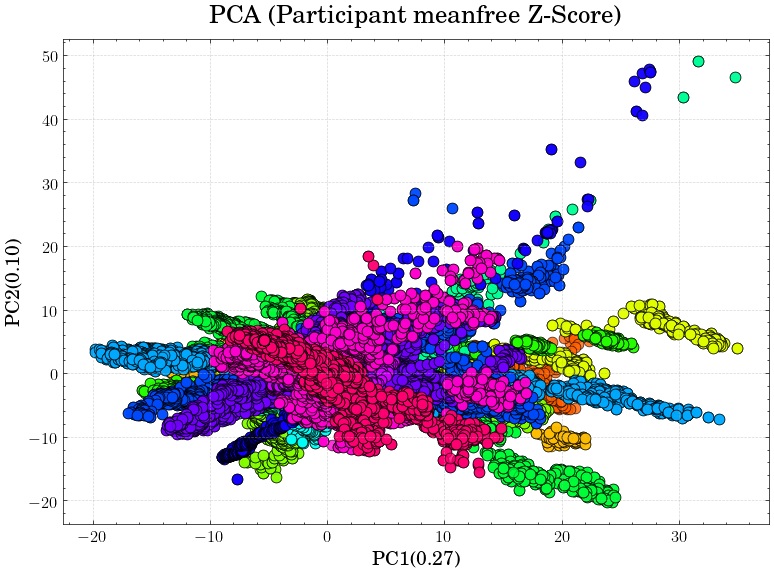

In [20]:
# ---------- Participant Mean-Free Normalization ----------
X_p_free, Y_p_free, P_p_free = load_data(
    participants,
    z_score_norm="participant_meanfree",
    path=dataset_dir,
    print_info=False
)

plot_pca_by_participant(
    X_p_free,
    P_p_free,
    method_name="Participant meanfree Z-Score",
    show_legend=False
)

### PCA Visualization

The PCA plots illustrate the impact of normalization:

- **Without normalization**, the data forms tight clusters by participant, suggesting strong identity-specific variance.
- **With Participant Mean-Free Normalization**, the participant clusters blend more, indicating reduced identity bias and improved potential for cross-subject generalization.

Despite slightly lower explained variance in the first two PCs, this normalization encourages the model to learn broader patterns rather than overfitting to specific individuals.
